# Test Jupyter Notebook for using ice core data from NSF Arctic Data Center


## Dataset Information
- Downloaded from NSF Arctic Data Center on 13 Feb 2019
- https://arcticdata.io/catalog/view/doi:10.18739/A26T0GW17
- citation: Joseph R. McConnell. 2018. Aerosol and chemical measurements from ice cores, Summit, Greenland, 1446-1763. urn:node:ARCTIC. doi:10.18739/A26T0GW17.


## Description of this jupyter notebook
Our main objective is to begin developing tools for working with and using ice core datasets. This jupyter notebook imports one such dataset and uses basic plotting in python to visualize it

In [87]:
#load libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import csv
import pandas as pd

In [88]:
#load the datasets (assumes data is located in a subdirectory of this jupyter notebook called 'data')
c14 = pd.read_csv('./data/C14_prelim_database_121418.csv',\
                 sep=',', header=0)
    
Summit = pd.read_csv('./data/SummitBID_database_121418.csv',\
                 sep=',', header=0)


In [89]:
#replace no data values with nan. Requires knowledge of no data value a priori.
#df.replace and masks that are np arrays will not work!
c14 = c14.mask(np.isclose(c14,-0.999), np.nan)
Summit = Summit.mask(np.isclose(Summit,-0.999), np.nan)

In [90]:
print(c14.columns)
print(Summit.columns)

print(c14.loc[0:10,['depth_m','year','Na_ng_g']])

Index(['depth_m', 'depth_mweq', 'year', 'BCconc_ppb', 'h2o2_uM', 'nh4_uM',
       'hno3_uM', 'insoluble_particle_counts_ug_g', 'dO18_permil', 'dD_permil',
       'Na_ng_g', 'S_ng_g', 'Cl_ng_g', 'Ca_ng_g', 'Br_ng_g', 'Sr_ng_g'],
      dtype='object')
Index(['depth_m', 'depth_mweq', 'year', 'BCconc_ppb', 'h2o2_uM', 'nh4_uM',
       'hno3_uM', 'insoluble_particle_counts_ug_g', 'dO18_permil', 'dD_permil',
       'Na_ng_g', 'S_ng_g', 'Cl_ng_g', 'Ca_ng_g', 'Br_ng_g', 'Sr_ng_g'],
      dtype='object')
    depth_m      year  Na_ng_g
0    80.305  1772.899    4.610
1    80.315  1772.851    4.610
2    80.325  1772.804    3.754
3    80.335  1772.757    2.451
4    80.345  1772.710    1.525
5    80.355  1772.663    1.150
6    80.365  1772.616      NaN
7    80.375  1772.569    0.809
8    80.385  1772.522    0.860
9    80.395  1772.475    1.045
10   80.405  1772.427    1.329


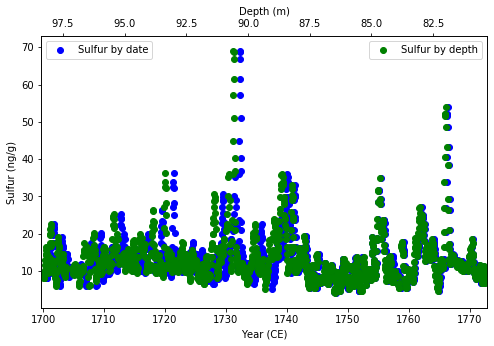

In [91]:
#plot some of the data

#plot time and depth vs S for c14 data
#as it stands right now, this plot suggests to me that the year-depth relationship is not consistent!!!
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5), squeeze=False)

axes[0,0].scatter(c14.year, c14.S_ng_g, color='blue', label='Sulfur by date')
axes[0,0].set_xlim(min(c14.year),max(c14.year))

axes002 = axes[0,0].twiny()
#axes002.set_xlim(axes[0,0].get_xlim())
axes002.scatter(c14.depth_m, c14.S_ng_g, color='green', label='Sulfur by depth')
axes002.invert_xaxis()
axes002.set_xlim(max(c14.depth_m),min(c14.depth_m))

axes[0,0].legend(loc=2)
axes002.legend(loc=1)

axes[0,0].set_xlabel('Year (CE)')
axes002.set_xlabel('Depth (m)')
axes[0,0].set_ylabel('Sulfur (ng/g)')

#axes002.cla()

plt.show()

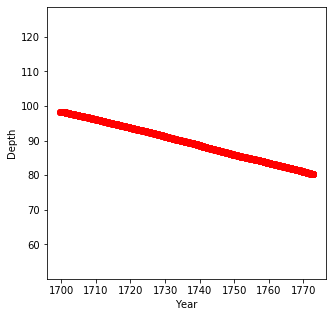

In [92]:
#given how the above figure looks, is the relationship between date and depth linear?
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5), squeeze=False)

axes[0,0].scatter(c14.year, c14.depth_m, color='red')
axes[0,0].axis('equal')

axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Depth')
                  
plt.show()

In [93]:
#plot time and depth vs S for c14 data
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5), squeeze=False)

axes[0,0].scatter(Summit.year, Summit.S_ng_g, color='blue', label='Sulfur by date')
axes[0,0].set_xlim(min(Summit.year),max(Summit.year))

axes002 = axes[0,0].twiny()
axes002.scatter(Summit.depth_m, Summit.S_ng_g, color='green', label='Sulfur by depth')
axes002.invert_xaxis()
axes002.set_xlim(max(Summit.depth_m),min(Summit.depth_m))

axes[0,0].legend(loc=2)
axes002.legend(loc=1)

axes[0,0].set_xlabel('Year (CE)')
axes002.set_xlabel('Depth (m)')
axes[0,0].set_ylabel('Sulfur (ng/g)')


plt.show()

In [94]:
#plot time and depth vs S for c14 data
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4), squeeze=False)
#defining an array of colors  
#colors = ['#2300A8', '#00A658']
colors = ['darkblue']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
axes[0,0].scatter(Summit.year, Summit.S_ng_g,color=colors, alpha=0.70, marker='o',s=4, label='McConnell et al., 2018')
#axes[0,0].line(Summit.year, Summit.S_ng_g,color=colors, alpha=0.70, marker='_',s=4, label='McConnell et al., 2018')
#axes[0,0].set_xlim(min(Summit.year),max(Summit.year))
axes[0,0].set_xlim(1600,1700)
axes[0,0].set_ylim(0,100)


axes[0,0].legend(loc=2)
axes002.legend(loc=1)
plt.text(1640, 90,'Abu')
plt.annotate('local max', xy=(1660, 70), xytext=(1665, 75),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
axes[0,0].set_xlabel('Year (C.E.)', fontdict=font)
axes[0,0].set_ylabel('S (ng/g)', fontdict=font)
#add major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.show()

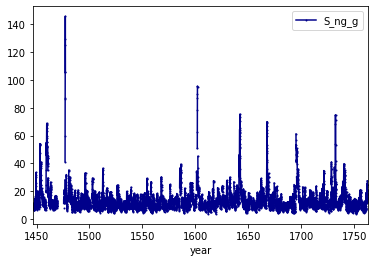

In [111]:
marker_style = dict(color='blue', linestyle=':', marker='o',markersize=1)
Summit.plot(x='year', y='S_ng_g', linestyle='-', marker='o', color='darkblue', markersize=1)

plt.show()
#plt.savefig('McConnel.png', bbox_inches='tight')